# MIE1624HF Assignment 1

Author: Tiana Wei (1004984216)

Date: 2020/10/10

## The objectives of assignment to explore the survey data to understand 
### **(1) the nature of women’s representation in Data Science and Machine Learning** 
### **(2) the effects of education on income level**.

In [1]:
## import packages
import numpy as np
import pandas as pd
import os,sys,random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# for pair-wise comparison
!pip install statsmodels

In [2]:
## specify the columns to read (I only need these columns)
fields = ['Q1','Q2','Q3','Q4','Q10','Q15','Q23']

## read the cleaned dataset 
df = pd.read_csv("clean_kaggle_data.csv", usecols=fields)

In [3]:
## Add meaningful column names
df.columns = ['age_range','gender','country','degree','salary_yr','code_experience','ML_experience']
df.head(5)

,age_range,gender,country,degree,salary_yr,code_experience,ML_experience
0,22-24,Male,France,Master’s degree,40000,1-2 years,1-2 years
1,40-44,Male,India,Professional degree,7500,I have never written code,NaN
2,40-44,Male,Australia,Master’s degree,300000,1-2 years,2-3 years
3,22-24,Male,India,Bachelor’s degree,5000,< 1 years,< 1 years
4,50-54,Male,France,Master’s degree,70000,20+ years,10-15 years


# Question 1:
### [3pts]

Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. Present **3 graphical figures that represent different trends in the data**. For your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.

## Exploration 1: Do people at different age-range have different levels of professional experience in coding?

In [4]:
## group the data by both factors of age_range and code_experience and take the size of each subgroups as a new column "count"
age_coding = pd.DataFrame({'count' : df.groupby( ['age_range','code_experience'] ).size()}).reset_index()
age_coding.head(7) # look at the first 7 rows of the dataframe


,age_range,code_experience,count
0,18-21,1-2 years,153
1,18-21,10-20 years,2
2,18-21,20+ years,2
3,18-21,3-5 years,48
4,18-21,5-10 years,5
5,18-21,< 1 years,135
6,18-21,I have never written code,28


In [5]:
# use pivot to reshape the datafrom from long to wide formate for the ease of plotting later on
age_coding_wide = age_coding.pivot(index = 'age_range', columns = 'code_experience', values = 'count')
# reorder the index from high to low coding experience for the ease of interpretion
exp_order = ['20+ years','10-20 years','5-10 years','3-5 years','1-2 years','< 1 years','I have never written code']
age_coding_wide = age_coding_wide.reindex(columns = exp_order)
age_coding_wide

code_experience,20+ years,10-20 years,5-10 years,3-5 years,1-2 years,< 1 years,I have never written code
age_range,,,,,,,
18-21,2,2,5,48,153,135,28
22-24,2,3,44,357,565,437,62
25-29,4,19,348,970,799,537,118
30-34,3,168,606,622,471,310,94
35-39,19,299,349,321,264,242,79
40-44,74,251,167,193,191,158,54
45-49,87,132,90,134,116,111,51
50-54,135,67,59,101,66,68,33
55-59,93,36,44,37,48,29,12


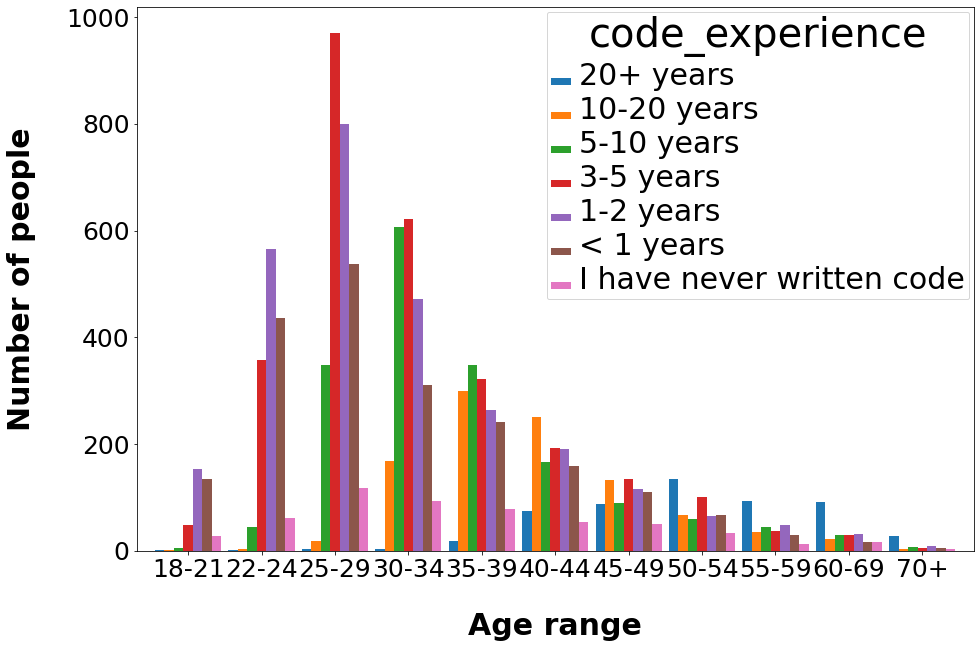

In [6]:
# plot the professional experience in coding according to gender
# fontsize for x,yticks, rot for xticks rotation, width for bar width
age_coding_plot = age_coding_wide.plot.bar(figsize = [15,10], fontsize = 20, rot=0, width=0.9) 
# set x,y labels
age_coding_plot.set_xlabel("Age range",labelpad=30, weight='bold', size=30)
age_coding_plot.set_ylabel("Number of people",labelpad=30, weight='bold', size=30)
# set x,y ticks
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
# set legend
plt.setp(age_coding_plot.get_legend().get_texts(), fontsize='30') # for legend text
plt.setp(age_coding_plot.get_legend().get_title(), fontsize='40') # for legend title
plt.show()


### From the above bar graph, we can derive two pieces of informtion about the data:

#### (1) The majority of the population surveyed aged between 22 to 34 year-old.

#### (2) Based on the survey, it seems like coding experience generally increases with age. 

By looking at the peak coding experience in each age group, we can see a gradual change in that the older people get the more years of coding experience they have. 

**18-24 yr**: mostly **1-2 years** coding experience

**25-34 yr**: mostly **3-5 years** coding experience

**35-39 yr**: mostly **5-10 years** coding experience

**40-44 yr**: mostly **10-20 years** coding experience

**45-49 yr**: pretty equally spread with two peaks at **3-5 years and 10-20 years** coding experience

**50-70+ yr**: mostly **20+ years** coding experience


## Exploration 2: Do people with different education degrees have different levels of professional experience in machine learning (ML)?

In [7]:
edu_ML = pd.DataFrame({'count' : df.groupby( ['degree','ML_experience'] ).size()}).reset_index()
edu_ML = edu_ML[(edu_ML['degree'] == 'Bachelor’s degree') 
                 | (edu_ML['degree'] == 'Master’s degree')
                 | (edu_ML['degree'] == 'Doctoral degree')]
edu_ML.head(7) # look at the first 7 rows of the dataframe


,degree,ML_experience,count
0,Bachelor’s degree,1-2 years,807
1,Bachelor’s degree,10-15 years,29
2,Bachelor’s degree,2-3 years,355
3,Bachelor’s degree,20+ years,16
4,Bachelor’s degree,3-4 years,180
5,Bachelor’s degree,4-5 years,123
6,Bachelor’s degree,5-10 years,90


In [8]:
# use pivot to reshape the datafrom from long to wide formate for the ease of plotting later on
edu_ML_wide = edu_ML.pivot(index = 'degree', columns = 'ML_experience', values = 'count')
# reorder the index from high to low coding experience for the ease of interpretion
MLexp_order = ['20+ years','10-15 years','5-10 years','4-5 years','3-4 years','2-3 years','1-2 years']
degree_order = ['Bachelor’s degree', 'Master’s degree', 'Doctoral degree']
edu_ML_wide = edu_ML_wide.reindex(degree_order, columns = MLexp_order)
edu_ML_wide

ML_experience,20+ years,10-15 years,5-10 years,4-5 years,3-4 years,2-3 years,1-2 years
degree,,,,,,,
Bachelor’s degree,16,29,90,123,180,355,807
Master’s degree,63,107,362,429,512,840,1367
Doctoral degree,87,171,332,265,216,248,310


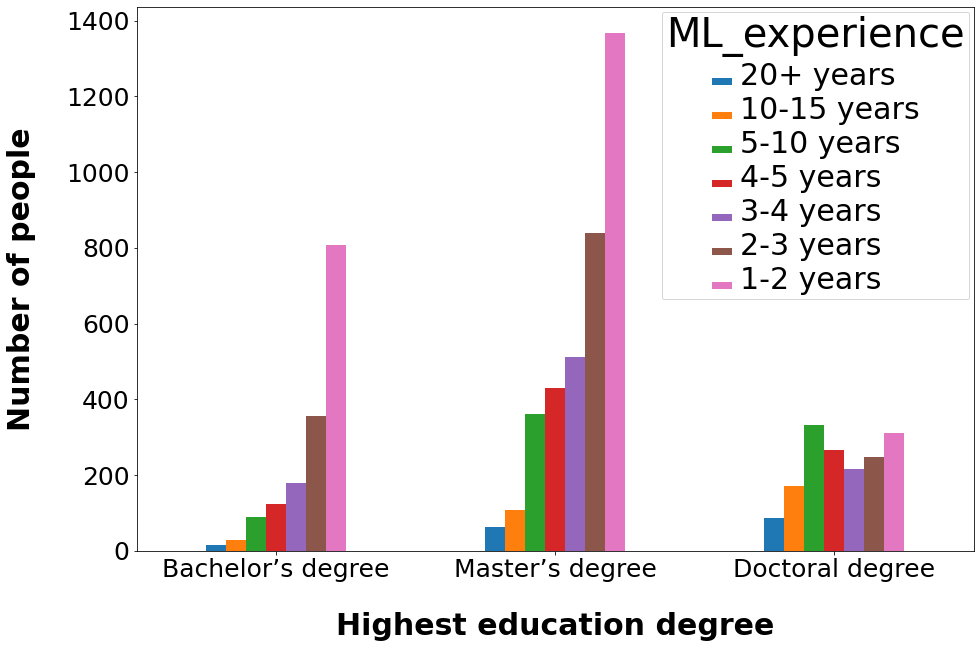

In [9]:
# plot the professional experience in coding according to gender
edu_ML_plot = edu_ML_wide.plot.bar(figsize = [15,10], fontsize = 20, rot=0) # fontsize for x,yticks
# set x,y labels
edu_ML_plot.set_xlabel("Highest education degree",labelpad=30, weight='bold', size=30)
edu_ML_plot.set_ylabel("Number of people",labelpad=30, weight='bold', size=30)
# set x,y ticks
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
# set legend
plt.setp(edu_ML_plot.get_legend().get_texts(), fontsize='30') # for legend text
plt.setp(edu_ML_plot.get_legend().get_title(), fontsize='40') # for legend title
plt.show()

### From the above graph, we can observe three trends in the survey data:

#### (1) The majority of the population surveyed have Master's degree as their highest education degree.

#### (2) The majority of the population surveyed is rather new to machine learning (ML) (1-2 years of experience).

#### (3) The general levels of ML experience differ between Bachelor's/Master's degree and Doctoral degree.

For those who have **Bachelor's and Master's** degrees as their highest education degree, the majority of them have had **1-2 years of ML experience**. The number of people decreases with the increase of ML experience. On the other hand, for those who have **Doctoral degree** as their highest education, the population spread through all levels of ML experience rather equally compared to the other two education groups, with **5-10 years and 1-2 years of ML experience** being the most populated answers.

## Exploration 3: How does annual salary differ across countries and world regions?

In [10]:
# group by country and take mean of the salary column under each country
country_salary = pd.DataFrame({'mean_salary' : df.groupby(['country'])['salary_yr'].mean(),
                               'std_salary' : df.groupby(['country'])['salary_yr'].std()}).reset_index()
# exclude unnamed countries (other)
country_salary = country_salary.drop([35])
# sort rows from highest to lowest mean salary
country_salary.sort_values('mean_salary', inplace = True, ascending = False)
# save the sorted order of country for later boxplot sorting
sorted_index = country_salary['country'].to_numpy()

In [11]:
## add a column to denote world regions based on United Nations Country Grouping
## https://www.internetworldstats.com/list1.htm#EU

# add an empty column for world region
country_salary['world_region'] = ""
# save the indices for each world region
Africa = [21,44,47,48,50,55,57]
Asia = [10,12,19,23,26,28,30,36,37,40,43,49,51,53,54]
Central_America = [38]
Europe = [2,4,6,35,39,42,45]
EU = [5,9,11,13,14,15,16,18,20,22,24,25,29,32,33,34]
Middle_east = [3,17,56]
North_America = [0,8]
Oceania = [1,7]
South_America = [27,31,41,46,52]
# create lists for looping
region_list = [Africa,Asia,Central_America,Europe,EU,Middle_east,North_America,Oceania,South_America]
region_name = ['Africa','Asia','Central_America','Europe','European_Union','Middle_East','North_America','Oceania',
              'South_America']
# loop through each world region to assign values in the column
for i in range(0,len(region_list)):
    country_salary.iloc[region_list[i], country_salary.columns.get_loc('world_region')] = region_name[i]
country_salary.head(5)

,country,mean_salary,std_salary,world_region
57,United States of America,137324.976570,88429.422245,North_America
2,Australia,116447.115385,89812.604644,Oceania
50,Switzerland,115708.333333,61429.780707,Europe
24,Israel,108322.784810,83390.340936,Middle_East
34,Norway,97641.025641,54354.338024,Europe


In [12]:
# for box plot to show more statistical parameters
country_salary1 = df[['country','salary_yr']]
country_salary1 = country_salary1[country_salary1['country'] != 'Other']

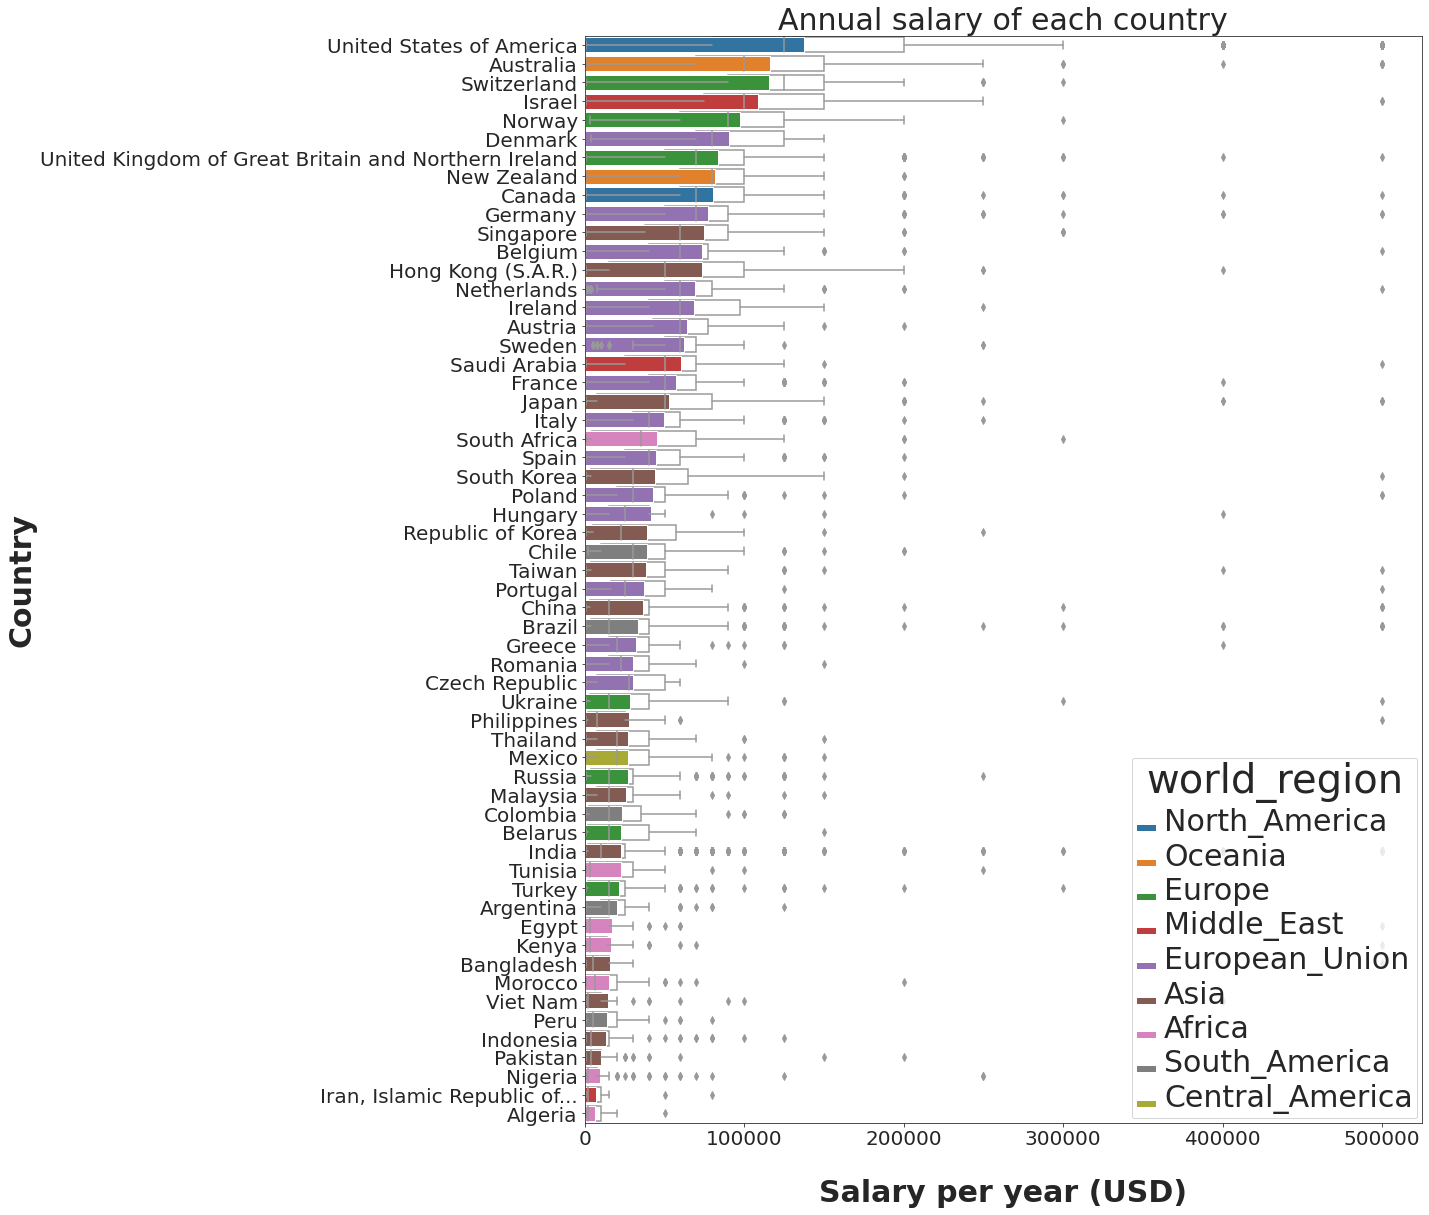

In [13]:
# set figure size
plt.figure(figsize=(15,20))
# set figure theme style and ticks size
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})
# plot the country and salary data color-grouped by world regions
# plot horizontal for easier read of countries
plot = sns.barplot(x='mean_salary', y='country', hue='world_region', data=country_salary,dodge=False)
# set legend
plt.setp(plot.get_legend().get_texts(), fontsize='30') # for legend text
plt.setp(plot.get_legend().get_title(), fontsize='40') # for legend title

# plot box plot along with the bar plot to give extra statistical information (median, quartiles, outliers)
sns.boxplot(x='salary_yr', y='country', data=country_salary1, order=sorted_index,color="white")


# figure parameter setting
plt.xlabel("Salary per year (USD)", labelpad=30, weight='bold', size=30)
plt.ylabel("Country",weight='bold', size=30)
plt.title("Annual salary of each country", size = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



### From the above graph, we can explore the salary differences across countries and world regions shown in the survey data.

The bar plot denotes the mean salary of each country while the box plot shows the median, the 4 quartiles of each country's salary, and outliers.

As we can easily notice, U.S.A (not surprisingly) has the highest mean salary leading all the other countries. Immediately following U.S.A are a number of Oceania and European countries, plus Canada and a single Middle East country (Isreal). After the top 10 countries, the upper middle ground is mostly occuppied by European Union and Asian countries while the lower half is a mix of non-EU European, Asian, South/Central American, and African countries. 

We can observe a drastic salary gap between the western and easter non-EU European countries (in color green), as the western ones are on the top while the eastern ones are on the bottom of the graph. North American and Oceania countries are all in top 10. EU countries span over the top to middle part of the graph. Asian countries are rather equally spred throughout the whole list. The three Middle East countries each locates in one section of the graph - top, middle, and bottom. South/Central American and Afrian countries are generally having lower mean salary.

# Question 2

### [4pts]

Estimating the difference between average salary (Q10) of males vs. females

### a. [0.5pts] Compute and report descriptive statistics for each group (remove missing data, if necessary).

In [14]:
# only need the columns of gender and salary
gender_salary = df[['gender','salary_yr']]
# only take male and female data
gender_salary = gender_salary[(gender_salary['gender'] == 'Male') | (gender_salary['gender'] == 'Female')]
# get descriptive stats for each gender group
gender_salary.groupby('gender').describe()

salary_yr                                                       \
           count          mean           std     min     25%      50%   
gender                                                                  
Female    1827.0  45933.771210  60253.789591  1000.0  3000.0  20000.0   
Male     10473.0  58709.586556  74920.620048  1000.0  7500.0  30000.0   

                           
            75%       max  
gender                     
Female  70000.0  500000.0  
Male    80000.0  500000.0

From the output of .describe(), we have the total number of data points, mean salary, standard deviation of salary, and the four quartiles (including the median = 50%) of the salary for each gender group. 

### b. [0.5pts] If suitable, perform a two-sample t-test with 0.05 threshold. Explain your rationale.

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

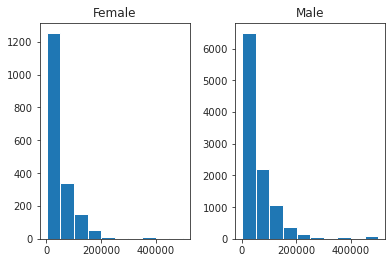

In [15]:
gender_salary.hist(by = 'gender', rot = 0)

The left graph is the distribution of female salary and the right graph is for male salary. They both have a right-skewed distribution, with most of the data points populating the lower end of salary and only few people getting above 200,000 USD. Since both female and male salary are not normally distributed, t-test will not be applicable here. The goal of a t-test is to test whether the mean of two groups are significantly different. However, when the distribution of the two groups are not normal, the mean is not the best representation of the groups. In this case, even if a t-test supports that the means of the two groups are significantly different from each other, the two groups might not be significantly different. Therefore, t-test should only be used when the assumption of normal distibution is met.
 

### c. [1.5pts] Bootstrap your data for comparing the mean of salary (Q10) for the two groups.
Note that the number of instances you sample from each group should be relative to its
size. Use 1000 replications. Plot two bootstrapped distributions (for males and females)
and the distribution of the difference in means.

In [16]:
from sklearn.utils import resample
# number of iteration
iteration = 1000

# create two empty lists for bootstraped means
female_bootstrap_means = []
male_bootstrap_means = []

# loop through 1000 iterations and take means to save in the list
for i in range(iteration):
    female_boot_mean = np.mean(resample(gender_salary[gender_salary['gender'] == 'Female']['salary_yr'], 
                                replace=True, n_samples=len(gender_salary[gender_salary['gender'] == 'Female'])))
    female_bootstrap_means.append(female_boot_mean)
    male_boot_mean = np.mean(resample(gender_salary[gender_salary['gender'] == 'Male']['salary_yr'], 
                                replace=True, n_samples=len(gender_salary[gender_salary['gender'] == 'Male'])))
    male_bootstrap_means.append(male_boot_mean)
    


Text(0.5, 1.0, 'Bootstrapped distributions of salary')

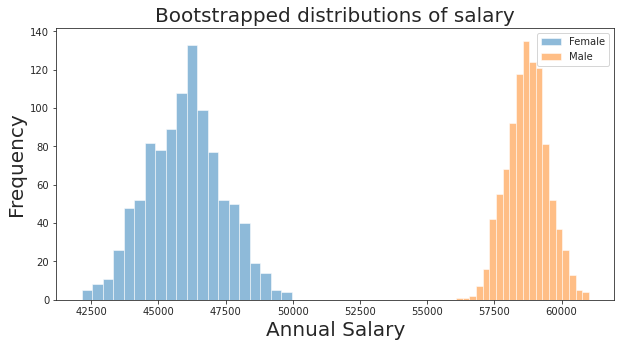

In [17]:
# plot the bootstrapped means in one graph
plt.figure(figsize=(10,5))
plt.hist(female_bootstrap_means, bins = 20,label = 'Female', alpha = 0.5)
plt.hist(male_bootstrap_means, bins = 20,label = 'Male', alpha = 0.5)
plt.legend()
plt.xlabel('Annual Salary',size = 20)
plt.ylabel('Frequency',size = 20)
plt.title('Bootstrapped distributions of salary', size = 20)

#### Plot the difference of salary between genders.

For this, we need to calculate the difference of the means of male and female bootstrapped distributions and the sum of the variance of the distributions. The distribution of the difference will have the mean as the difference of means and the variance as the sum of variances.

In [18]:
n_female_salary_boots = len(female_bootstrap_means)
n_male_salary_boots = len(male_bootstrap_means)

# get the mean of the bootstrapped distribution of female and male
mu_female_salary_boots = np.mean(female_bootstrap_means)
mu_male_salary_boots = np.mean(male_bootstrap_means)
diff_mean = mu_male_salary_boots - mu_female_salary_boots  # difference in the means of distributions
# get the variance of the boostrapped distribution of female and male
var_female_salary_boots = np.var(female_bootstrap_means)
var_male_salary_boots = np.var(male_bootstrap_means)
diff_var = var_female_salary_boots/n_female_salary_boots + var_male_salary_boots/n_male_salary_boots

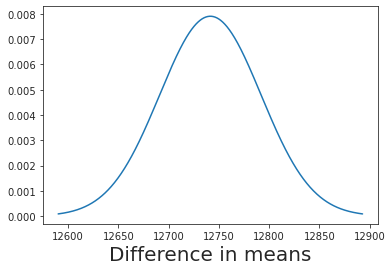

In [19]:
mu = diff_mean
sigma = np.sqrt(diff_var) # square root var to get sigma
## randomly create a 1000 datapoints in between +- 3 standard deviation from mean to stimulate a normal distribution of the difference
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('Difference in means', size = 20)
#plt.title('Distribution of the difference', size = 20)
plt.show()

### d. [0.5pts] If suitable, perform a two-sample t-test with 0.05 threshold on the bootstrapped data. Explain your rationale.

#### T-test between bootstrapped data for male and female salary.

From the graph of "Bootstrapped distributions of salary", we can see that both the male and female bootstrapped data form normal distributions as one would expect based on the Central Limit Theorem. Now that the two data have normal distribution, an independent t-test will be suitable to test whether the bootstapped salary between male and female is significantly different by testing whether the means of the two distributions are significantly different.

Hypothesis testing:

**$H_0$ = There is no difference between male and female annual salary**

**$H_a$ = There is a difference between male and female annual salary**

$\alpha$ = 5%

In [20]:
# independent t-test between bootstrapped data of male and female
ttest, pval= stats.ttest_ind(male_bootstrap_means, female_bootstrap_means)

if pval < 0.05:
    print('t-stats:', ttest, ', p-value:', pval, ", Conclusion: Reject null hypothesis")
else:
    print(ttest, pval,"Fail to reject null hypothesis")

t-stats: 252.29890076404482 , p-value: 0.0 , Conclusion: Reject null hypothesis


### e. [1pts] Comment on your findings.

The result of the independent t-test shows that there is a difference between male and female annual salary. The result of comparing male to female salary gives us the t-statistics of 253.42 and the p-value of 0. This means that male salary is **always higher** than female salary in the bootstrapped data, as we can see from the "Bootstrapped distributions of salary" graph.

# Question 3

### [5pts] 

Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this
time use analysis of variance (ANOVA) instead of t test for hypothesis testing to compare the means
of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree).

### a. Compute and report descriptive statistics for each group (remove missing data, if necessary).

In [21]:
# only take the two columns of degree and salary
degree_salary = df[['degree', 'salary_yr']]
# only take bachelor's, master's, and doctoral degrees
degree_salary = degree_salary[(degree_salary['degree'] == 'Bachelor’s degree') 
                 | (degree_salary['degree'] == 'Master’s degree')
                 | (degree_salary['degree'] == 'Doctoral degree')]
# check if there is any missing data
degree_salary.isnull().values.any()
degree_salary.head()

,degree,salary_yr
0,Master’s degree,40000
2,Master’s degree,300000
3,Bachelor’s degree,5000
4,Master’s degree,70000
5,Master’s degree,15000


In [22]:
# show descriptive stats for each education group
degree_salary.groupby('degree').describe()

salary_yr                                               \
                      count          mean           std     min      25%   
degree                                                                     
Bachelor’s degree    3361.0  44999.256174  67923.680798  1000.0   3000.0   
Doctoral degree      2083.0  75761.401824  83376.717093  1000.0  15000.0   
Master’s degree      5868.0  58778.629857  70265.728605  1000.0   7500.0   

                                                
                       50%       75%       max  
degree                                          
Bachelor’s degree  15000.0   60000.0  500000.0  
Doctoral degree    60000.0  100000.0  500000.0  
Master’s degree    40000.0   80000.0  500000.0

### b. If suitable, perform ANOVA with 0.05 threshold. Explain your rationale.

array([<AxesSubplot:title={'center':'Bachelor’s degree'}>,
       <AxesSubplot:title={'center':'Doctoral degree'}>,
       <AxesSubplot:title={'center':'Master’s degree'}>], dtype=object)

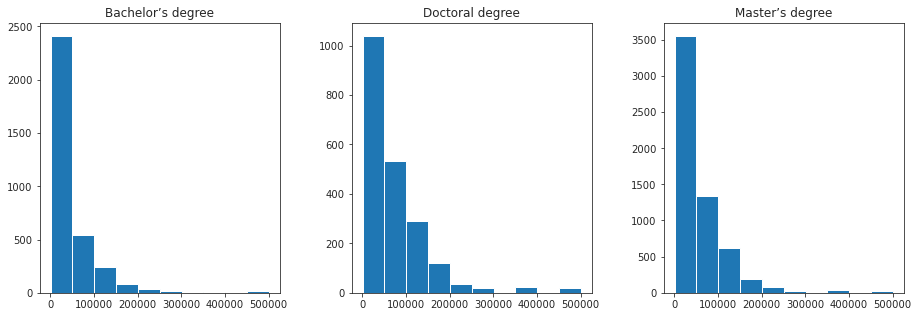

In [23]:
degree_salary.hist(by = 'degree', rot = 0, figsize=(15,5), layout = (1,3))

ANOVA is used to test whether there is/are significant difference(s) between 3 or more groups under the assumption that each group's data are normally distributed. The salary distribution of all degree groups are extremely non-normally distributed (right-skewed). In this case, even if we have thousands of data points per group, they are still not suitable for an ANOVA due the the violation of the normality assumption. 

### c. Bootstrap your data for comparing the mean of salary (Q10) for the three degree groups.
Note that the number of instances you sample from each group should be relative to its
size. Use 1000 replications. Plot three bootstrapped distributions and the distribution of the difference in means.

In [24]:
iteration = 1000

# create three empty lists for bootstraped means
BA_bootstrap_means = []
MA_bootstrap_means = []
PhD_bootstrap_means = []

# in each iteration, randomly sample as many times as the number of data point in each group with replacement
# take the mean of each iteration and save them as a list
for i in range(iteration):
    BA_boot_mean = np.mean(resample(degree_salary[degree_salary['degree'] == 'Bachelor’s degree']['salary_yr'], 
                                replace=True, n_samples=len(degree_salary[degree_salary['degree'] == 'Bachelor’s degree'])))
    BA_bootstrap_means.append(BA_boot_mean)
    MA_boot_mean = np.mean(resample(degree_salary[degree_salary['degree'] == 'Master’s degree']['salary_yr'], 
                                replace=True, n_samples=len(degree_salary[degree_salary['degree'] == 'Master’s degree'])))
    MA_bootstrap_means.append(MA_boot_mean)
    PhD_boot_mean = np.mean(resample(degree_salary[degree_salary['degree'] == 'Doctoral degree']['salary_yr'], 
                                replace=True, n_samples=len(degree_salary[degree_salary['degree'] == 'Doctoral degree'])))
    PhD_bootstrap_means.append(PhD_boot_mean)


Text(0.5, 1.0, 'Bootstrapped distributions of salary for each degree group')

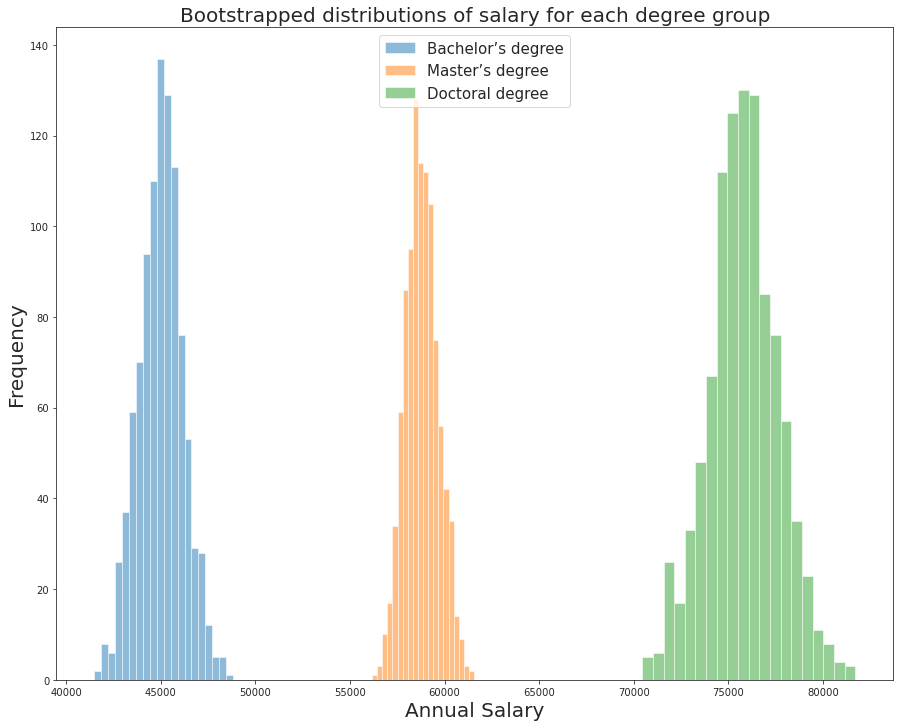

In [25]:
# plot the three bootstrapped distribution in one graph
plt.figure(figsize=(15,12))
plt.hist(BA_bootstrap_means, bins = 20,label = 'Bachelor’s degree', alpha = 0.5)
plt.hist(MA_bootstrap_means, bins = 20,label = 'Master’s degree', alpha = 0.5)
plt.hist(PhD_bootstrap_means, bins = 20,label = 'Doctoral degree', alpha = 0.5)
plt.legend(loc = 0, fontsize = 15)
plt.xlabel('Annual Salary',size = 20)
plt.ylabel('Frequency',size = 20)
plt.title('Bootstrapped distributions of salary for each degree group', size = 20)

Plot the difference between each two degree groups.

Three pairs of difference:

(1) between MA and BA
(2) between PhD and MA
(3) between PhD and BA

In [26]:
n_BA_salary_boots = len(BA_bootstrap_means)
n_MA_salary_boots = len(MA_bootstrap_means)
n_PhD_salary_boots = len(PhD_bootstrap_means)

# get the mean of the bootstrapped distribution of each degree group
mu_BA_salary_boots = np.mean(BA_bootstrap_means)
mu_MA_salary_boots = np.mean(MA_bootstrap_means)
mu_PhD_salary_boots = np.mean(PhD_bootstrap_means)
diff_MA_BA_mean = mu_MA_salary_boots - mu_BA_salary_boots  # difference in the means of distributions
diff_PhD_MA_mean = mu_PhD_salary_boots - mu_MA_salary_boots  # difference in the means of distributions
diff_PhD_BA_mean = mu_PhD_salary_boots - mu_BA_salary_boots  # difference in the means of distributions

# get the variance of the boostrapped distribution of each degree group
var_BA_salary_boots = np.var(BA_bootstrap_means)
var_MA_salary_boots = np.var(MA_bootstrap_means)
var_PhD_salary_boots = np.var(PhD_bootstrap_means)
diff_MA_BA_var = var_BA_salary_boots/n_BA_salary_boots + var_MA_salary_boots/n_MA_salary_boots
diff_PhD_MA_var = var_MA_salary_boots/n_MA_salary_boots + var_PhD_salary_boots/n_PhD_salary_boots
diff_PhD_BA_var = var_BA_salary_boots/n_BA_salary_boots + var_PhD_salary_boots/n_PhD_salary_boots


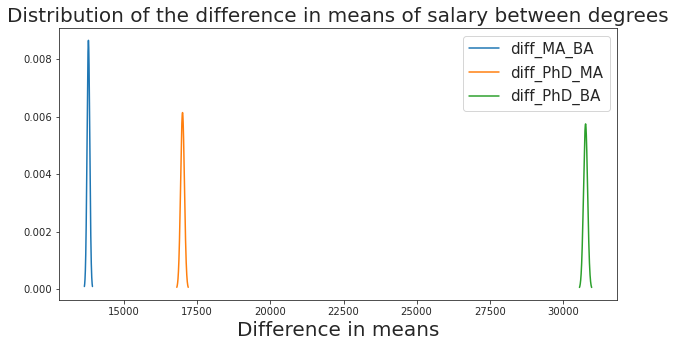

In [27]:
MA_BA_sigma = np.sqrt(diff_MA_BA_var) # square root var to get sigma
PhD_MA_sigma = np.sqrt(diff_PhD_MA_var)
PhD_BA_sigma = np.sqrt(diff_PhD_BA_var)

## randomly create a 1000 datapoints in between +- 3 standard deviation from mean to stimulate a normal distribution of the difference
x1 = np.linspace(diff_MA_BA_mean - 3*MA_BA_sigma, diff_MA_BA_mean + 3*MA_BA_sigma, 1000)
x2 = np.linspace(diff_PhD_MA_mean - 3*PhD_MA_sigma, diff_PhD_MA_mean + 3*PhD_MA_sigma, 1000)
x3 = np.linspace(diff_PhD_BA_mean - 3*PhD_BA_sigma, diff_PhD_BA_mean + 3*PhD_BA_sigma, 1000)

plt.figure(figsize = (10,5))
plt.plot(x1, stats.norm.pdf(x1, diff_MA_BA_mean, MA_BA_sigma))
plt.plot(x2, stats.norm.pdf(x2, diff_PhD_MA_mean, PhD_MA_sigma))
plt.plot(x3, stats.norm.pdf(x3, diff_PhD_BA_mean, PhD_BA_sigma))
plt.legend(['diff_MA_BA','diff_PhD_MA','diff_PhD_BA'], fontsize = 15)
plt.xlabel('Difference in means', size = 20)
plt.title('Distribution of the difference in means of salary between degrees', size = 20)
plt.show()

### d. If suitable, perform an ANOVA with 0.05 threshold on the bootstrapped data. Explain your rationale.

The bootstrapped data, as shown in the graph "Bootstrapped distributions of salary for each degree group", are normally distributed within each degree group. Therefore, the normality assumption for ANOVA is met. To know whether the three degree groups differ in the salary they recieve, we should do a one-way ANOVA (since we are looking at one factor(education) on salary) to test the following null and alternative hypotheses:

$H_0$: The mean salary of all degree groups are the same

$H_a$: At least one degree group's mean salary is different from the other groups

$\alpha$ = 5%

In [28]:
## use scipy.stats to do one-way ANOVA between the three degree group's bootstrapped data
stats.f_oneway(BA_bootstrap_means,MA_bootstrap_means,PhD_bootstrap_means)

F_onewayResult(statistic=127739.43931774625, pvalue=0.0)

### e. Comment on your findings.

The one-way ANOVA result shows F statistic of 135865.7 and p-value of 0, meaning that we successfully reject the null hypothesis and accept the alternative hypothesis that at least one degree group has different mean salary from the other groups. However, ANOVA does not tell us how many groups and which groups are significantly different. We will need to do post-hoc test such as Tukey's multiple pair-wise comparisons to get that information.

In [29]:
# Set up the data for paired comparison
bootstrapped = pd.concat([pd.DataFrame({'degree': 'BA','means': BA_bootstrap_means}),
                    pd.DataFrame({'degree': 'MA','means': MA_bootstrap_means}),
                    pd.DataFrame({'degree': 'PhD','means': PhD_bootstrap_means})])

In [30]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

# compare pairs of degree condition on their bootstrapped mean salary
MultiComp = MultiComparison(bootstrapped['means'], bootstrapped['degree'])
print(MultiComp.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    BA     MA 13778.9168 0.001 13635.8868 13921.9468   True
    BA    PhD 30774.6757 0.001 30631.6457 30917.7057   True
    MA    PhD 16995.7589 0.001 16852.7289 17138.7889   True
-----------------------------------------------------------


From the pair-wise comparison, we can see that all three groups are significantly different from each other since all three pairs of comparison **successfully reject** the null hypothesis that the two in a pair are the same. To sum up, people who have a Bachelor's degree, a Master's degree, and a Doctoral degree are getting different levels of salary.